## SCRAPING SITO DEL CENTRO RICERCA KRDB

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.inf.unibz.it/krdb/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
KRDB Research Centre for Knowledge and Data – KRDB Research Centre for Knowledge and Data


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
lista_url=list(set(lista_url))
lista_url

['https://www.inf.unibz.it/krdb/news/',
 'http://krdb.eu/sos-2020/',
 'https://www.inf.unibz.it/krdb/about_research/',
 'https://www.inf.unibz.it/krdb/',
 'https://www.inf.unibz.it/krdb/sos-2020/',
 'https://www.google.com/calendar/event?eid=XzZvcTNlZ2kxOGwwamNiYTY3MG8zOGI5azZjcTQ0YjlwNm9zNDhiOXA3MTJqYWhhNjhjb2ppaDFwNjBfMjAyMTAxMjcga3JkYi51bmliekBt&ctz=Europe/Rome',
 'https://www.google.com/calendar/event?eid=MmkybzFpbHExZmd0Z3FtOTdrdmRnNm1waGtfMjAyMTAxMTRUMTEzMDAwWiBrcmRiLnVuaWJ6QG0&ctz=Europe/Rome',
 'https://www.google.com/calendar/event?eid=XzY1MWpnYzlsODhzNDRiOWg4aDJqMmI5azhvcjQyYjlwODhvamliOWk2MTI0NmRwbTcxMjM4aGhoNm8ga3JkYi51bmliekBt&ctz=Europe/Rome',
 'https://www.inf.unibz.it/krdb/publications/',
 'http://maps.google.com/maps/ms?f=q&hl=en&geocode=&num=20&ie=UTF8&msa=0&msid=102778020508544394485.0004577c02a316da0e2a7&ll=46.496945,11.355615&spn=0.008715,0.020921&z=16',
 'https://www.google.com/calendar/event?eid=XzZwMTM0ZGkzNjRvamNiOWo4OHEzOGI5azY5MWpnYjlvOGgzNDhiYTU2b3NqaWU5bzhv

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.inf.unibz.it/krdb/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.inf.unibz.it/krdb/publications/',
 'https://www.inf.unibz.it/krdb/core/',
 'https://www.inf.unibz.it/krdb/fdt/',
 'https://www.inf.unibz.it/krdb/in2data/',
 'https://www.inf.unibz.it/krdb/news/',
 'https://www.inf.unibz.it/krdb/wp-login.php?saml_sso',
 'https://www.inf.unibz.it/krdb/prism/',
 'https://www.inf.unibz.it/krdb/about_research/',
 'https://www.inf.unibz.it/krdb/tech-reports/',
 'https://www.inf.unibz.it/krdb/how-to-reach-us/',
 'https://www.inf.unibz.it/krdb/',
 'https://www.inf.unibz.it/krdb/sos-2020/',
 'https://www.inf.unibz.it/krdb/people/',
 'https://www.inf.unibz.it/krdb/phd/']

In [5]:
indices=[0,4,6,7,8,10] 
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['https://www.inf.unibz.it/krdb/publications/',
 'https://www.inf.unibz.it/krdb/news/',
 'https://www.inf.unibz.it/krdb/prism/',
 'https://www.inf.unibz.it/krdb/about_research/',
 'https://www.inf.unibz.it/krdb/tech-reports/',
 'https://www.inf.unibz.it/krdb/']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['KRDB Publications – KRDB Research Centre for Knowledge and Data',
 'News – KRDB Research Centre for Knowledge and Data',
 'PRISM – KRDB Research Centre for Knowledge and Data',
 'About our research – KRDB Research Centre for Knowledge and Data',
 'KRDB Technical Reports series – KRDB Research Centre for Knowledge and Data',
 'KRDB Research Centre for Knowledge and Data – KRDB Research Centre for Knowledge and Data']

In [7]:
texts[1]

'\n\nRankings\nResearch quality evaluation (VQR) by the Italian Agency for the Evaluation of Universities and Research (ANVUR):\n\n(2011-2014) Our Faculty of Computer Science is the fourth best in research\xa0Italian computer science department (INF/01).\n(2004-2010) Our Faculty of Computer Science is the second best in research\xa0Italian computer science department (INF/01).\n\n\nThe Times Higher Education World University Rankings 2019 (in cooperation with Elsevier):\n\nThe Free University of Bozen-Bolzano is the ninth world’s best small university.\nThe Free University of Bozen-Bolzano is the second best young\xa0Italian university.\nThe Faculty of Computer Science of the Free University of Bozen-Bolzano ranks in the 126–150 range in the world.\nThe Faculty of Computer Science of the Free University of Bozen-Bolzano is the 21st best Computer Science department in the world for citations.\nThe Faculty of Computer Science of the Free University of Bozen-Bolzano is the fourth best Ita

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[1]

'  Rankings Research quality evaluation (VQR) by the Italian Agency for the Evaluation of Universities and Research (ANVUR):  (2011-2014) Our Faculty of Computer Science is the fourth best in research Italian computer science department (INF/01). (2004-2010) Our Faculty of Computer Science is the second best in research Italian computer science department (INF/01).   The Times Higher Education World University Rankings 2019 (in cooperation with Elsevier):  The Free University of Bozen-Bolzano is the ninth world’s best small university. The Free University of Bozen-Bolzano is the second best young Italian university. The Faculty of Computer Science of the Free University of Bozen-Bolzano ranks in the 126–150 range in the world. The Faculty of Computer Science of the Free University of Bozen-Bolzano is the 21st best Computer Science department in the world for citations. The Faculty of Computer Science of the Free University of Bozen-Bolzano is the fourth best Italian computer science de

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [11]:
texts3[0]

'2020 - Maria , Marco , : Temporal Over Finite with Uncertainty . 2020 : 10218 - 10225 . - Ana , , : Learning Query Inseparable . 2020 : 2959 - 2966 . - S . S . , , , : Ethical for AI . Conference on AI 2020 : 251 - 256 . - , , , Marco , : Combined and Beth Definability . ( 1 ) 2020 : 181 - 200 . - , , : in Enterprise Engineering - 9th Enterprise Engineering Working Conference , 2019 , , , May 20 - 24 , 2019 , . Lecture in Business Information 374 , Springer 2020 . - , : Diversity , Dependence and Independence . 2020 : 106 - 121 . - , Ana , , : Provenance for the Description Logic . 2020 : 1862 - 1869 . - , , , : Counting Query over a - Lite Knowledge Base . 2020 : 1658 - 1666 . - , Ana : On the of . 2020 : 1870 - 1876 . - : Conceptual as Ontological . 2020 : 5 . - C . M . , Prince , , , : Towards a Reference Ontology of Money : Monetary , and Related ( short paper ). 2020 : 170 - 178 . - , Prince , , Frederik : Economy , and Other Service Platform Related : a Reference Ontology Approa

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

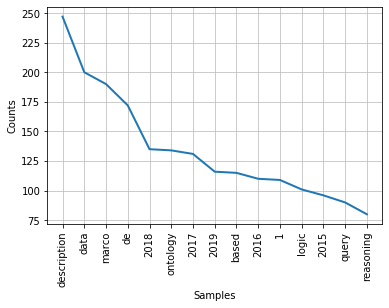

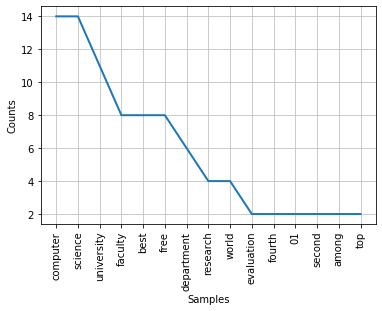

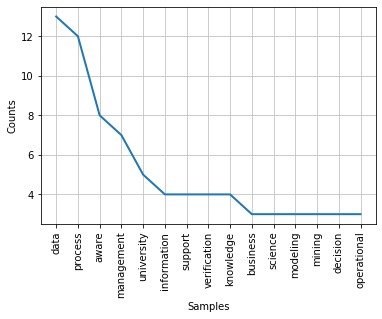

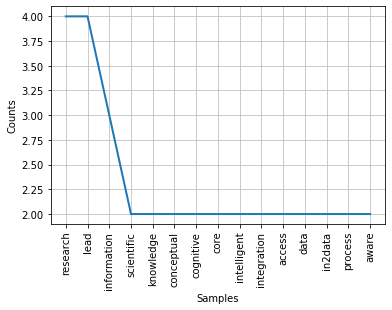

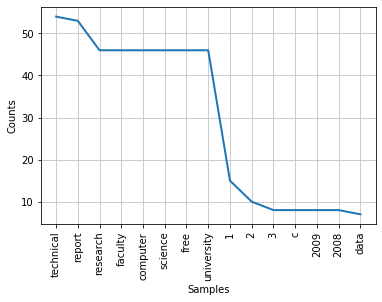

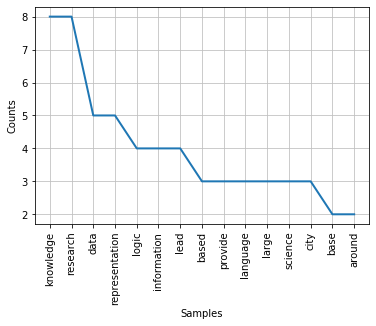

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

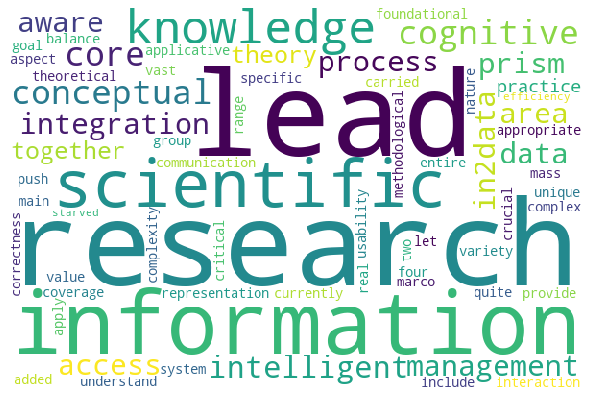

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [16]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [17]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

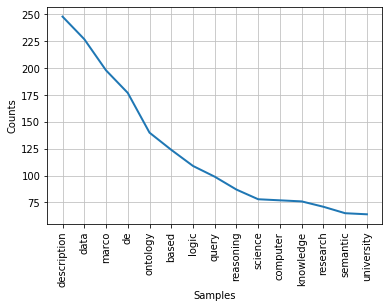

In [18]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [19]:
textfile = open('KRDB.txt', 'w')
textfile.write(tot_text)
textfile.close()

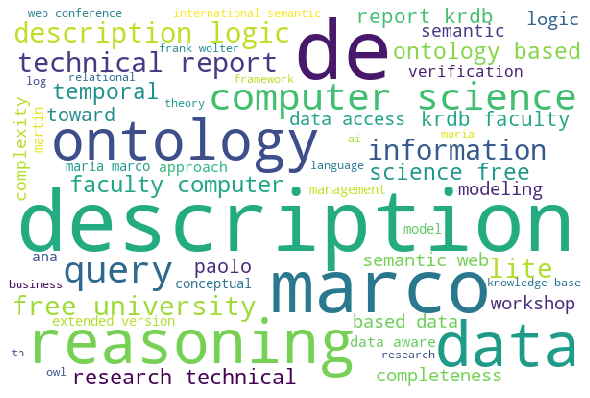

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()